In [46]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv(r"C:\Users\komat\Downloads\archive (3)\Churn_Modelling.csv")


# Display the first few rows of the dataframe
print(data.head())

# Data preprocessing
# Handle missing values if any
data = data.dropna()

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [47]:
# Preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Split the data into train and test sets
X = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Identify categorical and numerical columns
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [49]:
# Split the data into train and test sets
X = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Define models
log_reg = LogisticRegression()
rand_forest = RandomForestClassifier()
grad_boost = GradientBoostingClassifier()

In [51]:
# Create pipelines
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', log_reg)])

rand_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', rand_forest)])

grad_boost_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', grad_boost)])


In [52]:
# Train models
log_reg_pipeline.fit(X_train, y_train)
rand_forest_pipeline.fit(X_train, y_train)
grad_boost_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', GradientBoostingClassifier())])

In [53]:
# Predict on the test set
y_pred_log_reg = log_reg_pipeline.predict(X_test)
y_pred_rand_forest = rand_forest_pipeline.predict(X_test)
y_pred_grad_boost = grad_boost_pipeline.predict(X_test)

In [59]:
# Evaluate models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

log_reg_results = evaluate_model(y_test, y_pred_log_reg)
rand_forest_results = evaluate_model(y_test, y_pred_rand_forest)
grad_boost_results = evaluate_model(y_test, y_pred_grad_boost)

# Display the results
print("Logistic Regression Results:", log_reg_results)
print("Random Forest Results:", rand_forest_results)
print("Gradient Boosting Results:", grad_boost_results)

Logistic Regression Results: (0.811, 0.5524475524475524, 0.2010178117048346, 0.2947761194029851, 0.5805960247074267)
Random Forest Results: (0.8675, 0.7644628099173554, 0.4707379134860051, 0.5826771653543307, 0.7176340469732452)
Gradient Boosting Results: (0.8645, 0.7420634920634921, 0.4758269720101781, 0.5798449612403099, 0.717689466092208)


In [55]:
# Select the best model based on F1-score or ROC-AUC
best_model = grad_boost_pipeline  # Assuming Gradient Boosting performed the best

# Save the model for future use
import joblib
save_path = r"C:\Users\komat\best_churn_model.pkl"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

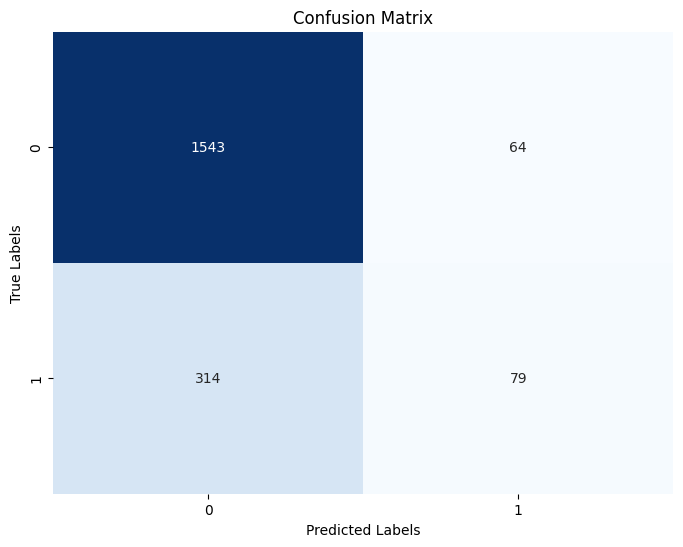

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [67]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined your preprocessing steps (preprocessor) and identified features (X_train, y_train, X_test, y_test)

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


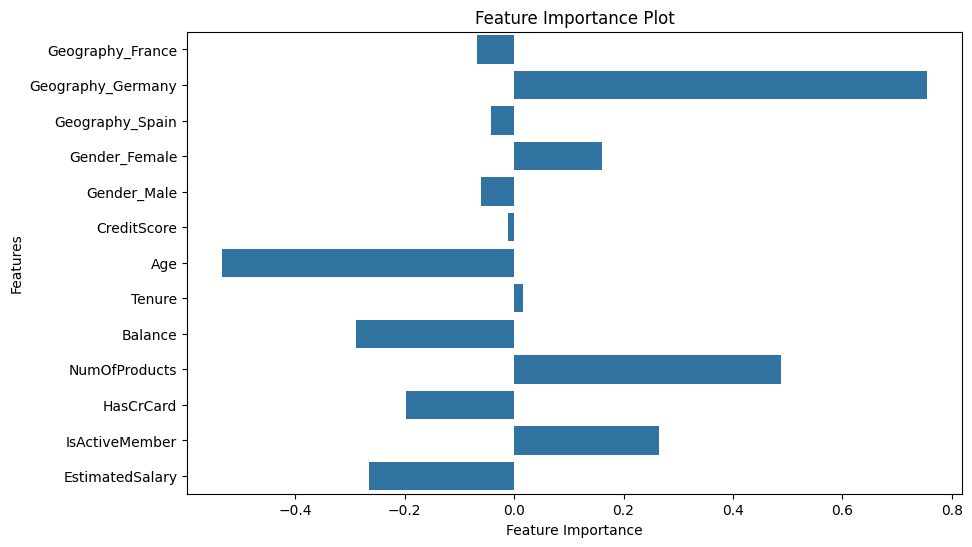

In [69]:
if hasattr(model.named_steps['classifier'], 'coef_'):
    # Retrieve feature names after one-hot encoding
    feature_names = list(model.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(input_features=categorical_features)) + numerical_features
    
    # Get coefficients and their names
    importances = model.named_steps['classifier'].coef_.flatten()
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()
